# Data Analysis of Building Energy Benchmarking Data
This is the final homework for DATA601 - Working with Data and Visualization

In this notebook I will import data from the City of Calgary regarding city owned building energy consumption and emissions performance. Data will be cleaned, statistically analyzed, and visualized to gain key insights about the energy performance of city buildings. A small report with follow in the README of this repo.


## Data Cleaning and Preprocessing

### Load and Inspect the Dataset

In [91]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# read in the data set
data = pd.read_csv('data/Building_Energy_Benchmarking.csv')
data.shape

(494, 31)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

In [93]:
data.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

In [94]:
data.dtypes

Property Id                                                                int64
Property Name                                                             object
Address 1                                                                 object
City                                                                      object
Postal Code                                                               object
Province                                                                  object
Primary Property Type - Self Selected                                     object
Number of Buildings                                                        int64
Year Built                                                                 int64
Property GFA - Self-Reported (m²)                                         object
ENERGY STAR Score                                                        float64
Site Energy Use (GJ)                                                      object
Weather Normalized Site Ener

Column data types do not all seem to align to what will be stored in them. For example, there are many columns that house numerical data, but have the object type, effectively storing numerical data as text. Before addressing that, let's inspect and handle the missing data


### Handling Missing Data

In [95]:
# identify the columns as a percentage of missing data, then sort by most missing % first
percent_missing = (data.isna().sum() / len(data)) * 100
percent_missing.sort_values(ascending=False)

District Hot Water Use (GJ)                                              96.963563
Electricity Use – Generated from Onsite Renewable Systems (kWh)          91.093117
ENERGY STAR Score                                                        66.599190
Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)    40.080972
Green Power - Onsite and Offsite (kWh)                                   40.080972
Natural Gas Use (GJ)                                                      2.024291
Weather Normalized Source Energy Use (GJ)                                 0.404858
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Property Name                                                             0.000000
Property Id                                                               0.000000
City                                                                      0.000000
Post

For this assignment, we are instructed to drop any columns missing more than 40% of their data

In [96]:
# drop the columns with over 40% data missing
columns_to_drop = percent_missing.index[percent_missing > 40]
data = data.drop(columns_to_drop, axis=1)
data.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Year Ending', 'Unique ID'],
      dtype='object')

In [97]:
percent_missing = (data.isna().sum() / len(data)) * 100
percent_missing.sort_values(ascending=False)

Natural Gas Use (GJ)                          2.024291
Weather Normalized Source Energy Use (GJ)     0.404858
Address 1                                     0.000000
City                                          0.000000
Postal Code                                   0.000000
Province                                      0.000000
Primary Property Type - Self Selected         0.000000
Number of Buildings                           0.000000
Property Id                                   0.000000
Property Name                                 0.000000
Property GFA - Self-Reported (m²)             0.000000
Year Built                                    0.000000
Site EUI (GJ/m²)                              0.000000
Site Energy Use (GJ)                          0.000000
Weather Normalized Site EUI (GJ/m²)           0.000000
Source Energy Use (GJ)                        0.000000
Source EUI (GJ/m²)                            0.000000
Weather Normalized Site Energy Use (GJ)       0.000000
Weather No

We still need to fill the Natural Gas Use and Weather Normalized Source Energy Use columns, however, they are numerical columns stored in text at the moment. Since we plan to fill data with imputed statistical values, we should make sure they are numerical data types before proceeding.

In [98]:
# Show data, dtypes for columns missing data.
display(data.loc[:,['Natural Gas Use (GJ)', 'Weather Normalized Source Energy Use (GJ)']])
print(data.loc[:,['Natural Gas Use (GJ)', 'Weather Normalized Source Energy Use (GJ)']].dtypes)

,Natural Gas Use (GJ),Weather Normalized Source Energy Use (GJ)
0,5453,9029
1,4725,12761
2,3,6707
3,506,18157
4,4926,9154
...,...,...
489,980,895
490,1040,1150
491,782,329
492,794,NaN


Natural Gas Use (GJ)                         object
Weather Normalized Source Energy Use (GJ)    object
dtype: object


Let's identify from the remaining columns which will need to be converted to a numeric type

In [99]:
data.dtypes

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)              object
Site Energy Use (GJ)                           object
Weather Normalized Site Energy Use (GJ)        object
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                         object
Weather Normalized Source Energy Use (GJ)      object
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

In [100]:

columns_to_clean = ['Property GFA - Self-Reported (m²)', 
                    'Site Energy Use (GJ)', 
                    'Weather Normalized Site Energy Use (GJ)',
                    'Source Energy Use (GJ)',
                    'Weather Normalized Source Energy Use (GJ)',
                    'Total GHG Emissions (Metric Tons CO2e)',
                    'Direct GHG Emissions (Metric Tons CO2e)',
                    'Electricity Use - Grid Purchase (kWh)',
                    'Natural Gas Use (GJ)'
                    ]

In [101]:
for column in columns_to_clean:
    print(data[column].apply(type).value_counts())

Property GFA - Self-Reported (m²)
<class 'str'>    494
Name: count, dtype: int64
Site Energy Use (GJ)
<class 'str'>    494
Name: count, dtype: int64
Weather Normalized Site Energy Use (GJ)
<class 'str'>    494
Name: count, dtype: int64
Source Energy Use (GJ)
<class 'str'>    494
Name: count, dtype: int64
Weather Normalized Source Energy Use (GJ)
<class 'str'>      492
<class 'float'>      2
Name: count, dtype: int64
Total GHG Emissions (Metric Tons CO2e)
<class 'str'>    494
Name: count, dtype: int64
Direct GHG Emissions (Metric Tons CO2e)
<class 'str'>    494
Name: count, dtype: int64
Electricity Use - Grid Purchase (kWh)
<class 'str'>    494
Name: count, dtype: int64
Natural Gas Use (GJ)
<class 'str'>      484
<class 'float'>     10
Name: count, dtype: int64


The values in the columns are most str type, with some values being numeric types. We need to take the data that is stored in str types, remove excess characters (I see many commas in the data), cast to an appropriate numeric type (we will use float), and store the float values in the dataframe. 

We can accomplish this with a function that we `df.apply()` across the columns that uses a RegEx replace `re.sub()`

In [102]:
def convert_to_numeric(value):
    """Convert numeric data stored in str types to float. Remove comma characters then cast to float.

    Args:
        value: the value stored in the cell

    Returns:
        value converted to float data type
    """
    try:
        # Remove commas
        if isinstance(value, str):
            cleaned_value = re.sub(",", "", value)
        
        else:
            cleaned_value = value

        # Convert to float 
        numeric_value = float(cleaned_value)
        return numeric_value
    # Handle cases where conversion fails
    except (ValueError, TypeError):  
        return pd.NA

# apply function to all columns that need cleaning   
for column in columns_to_clean:
    data[column] = data[column].apply(convert_to_numeric)

In [106]:
# Identify missing data in the cleaned columns as a percentage
missing_numerical = (data[columns_to_clean].isna().sum() / len(data)) * 100
missing_numerical.sort_values(ascending=False)

Natural Gas Use (GJ)                         2.024291
Weather Normalized Source Energy Use (GJ)    0.404858
Property GFA - Self-Reported (m²)            0.000000
Weather Normalized Site Energy Use (GJ)      0.000000
Site Energy Use (GJ)                         0.000000
Source Energy Use (GJ)                       0.000000
Total GHG Emissions (Metric Tons CO2e)       0.000000
Direct GHG Emissions (Metric Tons CO2e)      0.000000
Electricity Use - Grid Purchase (kWh)        0.000000
dtype: float64

In [105]:
data[columns_to_clean].dtypes

Property GFA - Self-Reported (m²)            float64
Site Energy Use (GJ)                         float64
Weather Normalized Site Energy Use (GJ)      float64
Source Energy Use (GJ)                       float64
Weather Normalized Source Energy Use (GJ)    float64
Total GHG Emissions (Metric Tons CO2e)       float64
Direct GHG Emissions (Metric Tons CO2e)      float64
Electricity Use - Grid Purchase (kWh)        float64
Natural Gas Use (GJ)                         float64
dtype: object

Now that the datatypes have been cleaned up into numerical types, we can impute the missing data more reliably

In [109]:
data[['Natural Gas Use (GJ)', 'Weather Normalized Source Energy Use (GJ)']] = data[['Natural Gas Use (GJ)', 'Weather Normalized Source Energy Use (GJ)']].fillna({
    'Natural Gas Use (GJ)': data['Natural Gas Use (GJ)'].median(),
    'Weather Normalized Source Energy Use (GJ)': data['Weather Normalized Source Energy Use (GJ)'].median()
})

In [110]:
percent_missing = (data.isna().sum() / len(data)) * 100
percent_missing.sort_values(ascending=False)

Property Id                                   0.0
Property Name                                 0.0
Address 1                                     0.0
City                                          0.0
Postal Code                                   0.0
Province                                      0.0
Primary Property Type - Self Selected         0.0
Number of Buildings                           0.0
Year Built                                    0.0
Property GFA - Self-Reported (m²)             0.0
Site Energy Use (GJ)                          0.0
Weather Normalized Site Energy Use (GJ)       0.0
Site EUI (GJ/m²)                              0.0
Weather Normalized Site EUI (GJ/m²)           0.0
Source Energy Use (GJ)                        0.0
Weather Normalized Source Energy Use (GJ)     0.0
Source EUI (GJ/m²)                            0.0
Weather Normalized Source EUI (GJ/m²)         0.0
Total GHG Emissions (Metric Tons CO2e)        0.0
Total GHG Emissions Intensity (kgCO2e/m²)     0.0


### Extracting and Cleaning Data Using RegEx

We used RegEx above to normalize our numeric data. Let's use it clean and extract data for Property Names and addresses

Starting with Postal codes, we can see that the data does not align to the T2G 0Z4 data standard of two-3 character string separated by a space.

In [114]:
data['Postal Code']

0      T2H 0Z4
1       t2e7l7
2      T2G 0W2
3       T2G0G2
4      T2G 4M7
        ...   
489    T2G 1T7
490    T2C 2X1
491    T2N 3G8
492    T2W 4H7
493    T3A 5G1
Name: Postal Code, Length: 494, dtype: object

In [115]:
def normalize_postal_code(postal_code):
    """Clean missing, excess spacing, and wrong case chars in Postal code data. Returns in form "T2X 1H5" 

    Args:
        postal_code (str): Postal code data with mix of proper and improper formatting
    """
    # if data is a string, use regex to clean
    if isinstance(postal_code, str):
        # remove non-alphanumeric chars, cast to uppercase
        cleaned_code = re.sub(r"[^a-zA-Z0-9]", "", postal_code).upper()
        # if string is not proper length
        if len(cleaned_code) != 6:
            return None
        # return first three, next three separated by a space
        return f"{cleaned_code[:3]} {cleaned_code[3:]}"
    
    else:
        return None
    

data['Postal Code'] = data['Postal Code'].apply(normalize_postal_code)

In [152]:
data['Address 1']

0           9009 Fairmount Dr SE
1                  2924 11 ST NE
2                   315 10 AV SE
3                    133 6 AV SE
4            2201 PORTLAND ST SE
                 ...            
489                 311 34 AV SE
490                4705 76 AV SE
491         1940 WESTMOUNT BV NW
492               2607 106 AV SW
493    10071 HIDDEN VALLEY DR NW
Name: Address 1, Length: 494, dtype: object

In [159]:
def split_address(df, address_column):
    """Splits address column into number, street name, street type, and quadrant.
       Ignores city, province, and zip code. Normalizes to uppercase.

    Args:
        df: The pandas DataFrame containing the address data.
        address_column: The name of the column containing the addresses.

    Returns:
        A pandas DataFrame with the new columns (number, street_name, street_type, quadrant).
        Returns the original DataFrame if any error occurs during processing.
    """

    try:
        # Define regular expressions for each component
        number_regex = r"(\d{1,5})"  # 1 to 5 digits
        street_type_regex = r"\b(St|Dr|Ave|AV|Rd|Tr|Bv|Trail|Road|WY|Blvd|Way|Building)\b"  # Street types observed in dataset
        quadrant_regex = r"\b(NE|NW|SE|SW)\b"  # Quadrants in Calgary

        # Initialize new columns in the DataFrame
        df[['number', 'street_name', 'street_type', 'quadrant']] = ''

        for index, row in df.iterrows():
            address = row[address_column]
            if not isinstance(address, str):
                continue

            address = address.upper()  # Normalize to uppercase

            # Remove city, province, and zip code (anything after the street type or quadrant)
            parts = address.split(",")  # Split by comma
            address = parts[0].strip()  # Take only the first part (address)

            # Extract the number
            number_match = re.search(number_regex, address)
            if number_match:
                df.loc[index, 'number'] = number_match.group(1)
                address = address.replace(number_match.group(0), "", 1).strip()

            # Extract the street type
            street_type_match = re.search(street_type_regex, address, re.IGNORECASE)
            if street_type_match:
                df.loc[index, 'street_type'] = street_type_match.group(1)
                address = address.replace(street_type_match.group(0), "", 1).strip()

            # Extract the quadrant
            quadrant_match = re.search(quadrant_regex, address, re.IGNORECASE)
            if quadrant_match:
                df.loc[index, 'quadrant'] = quadrant_match.group(1)
                address = address.replace(quadrant_match.group(0), "", 1).strip()

            # The remaining part is the street name
            df.loc[index, 'street_name'] = address.strip()

        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return df
    

data = split_address(data, 'Address 1')

In [166]:
data.loc[:,'number':]

,number,street_name,street_type,quadrant
0,9009,FAIRMOUNT,DR,SE
1,2924,11,ST,NE
2,315,10,AV,SE
3,133,6,AV,SE
4,2201,PORTLAND,ST,SE
...,...,...,...,...
489,311,34,AV,SE
490,4705,76,AV,SE
491,1940,WESTMOUNT,BV,NW
492,2607,106,AV,SW


In [167]:
data['street_type'].value_counts()

street_type
AV          159
ST          135
DR           60
RD           45
AVE          25
BV           15
WAY          15
TR           10
BUILDING      5
BLVD          5
WY            5
              5
TRAIL         5
ROAD          5
Name: count, dtype: int64

In [174]:
# normalize street types to common abbreviations
data['street_type'].replace({
    'TRAIL': 'TR',
    'ROAD': 'RD',
    'BLVD': 'BV',
    'AVE': 'AV',
    'WAY': 'WY'                      
    }, inplace=True)


data['street_type'].value_counts()

street_type
AV          184
ST          135
DR           60
RD           50
BV           20
WY           20
TR           15
BUILDING      5
              5
Name: count, dtype: int64

In [179]:
# create a new address column using the cleaned and normalized data
data['cleaned_address'] = data['number'] + ' ' + data['street_name'] + ' ' +  data['street_type'] + ' ' +  data['quadrant']

In [180]:
data['cleaned_address']

0           9009 FAIRMOUNT DR SE
1                  2924 11 ST NE
2                   315 10 AV SE
3                    133 6 AV SE
4            2201 PORTLAND ST SE
                 ...            
489                 311 34 AV SE
490                4705 76 AV SE
491         1940 WESTMOUNT BV NW
492               2607 106 AV SW
493    10071 HIDDEN VALLEY DR NW
Name: cleaned_address, Length: 494, dtype: object

In [184]:
data['Primary Property Type - Self Selected'].unique()

array(['Heated Swimming Pool', 'Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc.)',
       'Fitness Center/Health Club/Gym', 'Indoor Arena',
       'Non-Refrigerated Warehouse', 'Other - Public Services',
       'Fire Station', 'Ice/Curling Rink', 'Other - Recreation', 'Museum',
       'Mixed Use Property', 'Other', 'Social/Meeting Hall',
       'Self-Storage Facility', 'Distribution Center', 'Performing Arts'],
      dtype=object)

## Exploratory Data Analysis and Aggregations

### Statistical Summary 

In [264]:
# select numerical columns and use describe for summary stats
data.select_dtypes(include=['float64']).describe()


,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,4752.556883,8265.670040,8397.193117,1.774798,1.810324,10590.527733,10221.438866,2.282753,2.319717,340.382389,158.671660,281.868826,63.821862,6.011028e+05,5520.693522
std,10128.320688,19733.748811,19877.336939,1.306700,1.331529,23438.866328,22866.650000,1.597846,1.622897,333.924525,109.472637,884.613506,56.835735,1.184414e+06,17218.457051
min,113.000000,141.000000,146.000000,0.060000,0.060000,237.000000,146.000000,0.110000,0.110000,15.000000,10.200000,0.000000,0.000000,1.076580e+04,3.000000
25%,1096.650000,1232.825000,1256.150000,0.990000,1.000000,1601.525000,1562.825000,1.312500,1.350000,113.850000,93.100000,43.000000,33.325000,1.074446e+05,861.050000
50%,1806.750000,2555.650000,2572.500000,1.290000,1.310000,3238.600000,3144.800000,1.680000,1.690000,228.100000,117.600000,78.700000,43.900000,2.237719e+05,1569.750000
75%,4257.900000,7999.050000,8006.575000,2.065000,2.110000,10242.400000,9637.275000,2.622500,2.652500,447.900000,186.975000,247.425000,74.050000,5.492725e+05,4816.200000
max,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,1531.400000,666.200000,12243.000000,386.000000,9.786193e+06,238415.000000


### Aggregations

In [190]:
# Average EUI by property type
data.groupby(['Primary Property Type - Self Selected'])['Site EUI (GJ/m²)'].agg('mean').sort_values(ascending=False)

Primary Property Type - Self Selected
Heated Swimming Pool                                4.805333
Fitness Center/Health Club/Gym                      4.385000
Distribution Center                                 3.286000
Ice/Curling Rink                                    2.182200
Other - Recreation                                  2.165000
Museum                                              1.584000
Social/Meeting Hall                                 1.550000
Other - Public Services                             1.526000
Office                                              1.519636
Performing Arts                                     1.302000
Repair Services (Vehicle, Shoe, Locksmith, etc.)    1.248000
Fire Station                                        1.208827
Self-Storage Facility                               1.208000
Indoor Arena                                        1.106000
Non-Refrigerated Warehouse                          0.768000
Mixed Use Property                             

In [191]:
# Total Emissions by year
data.groupby(['Year Ending'])['Total GHG Emissions (Metric Tons CO2e)'].sum()

Year Ending
2019    75605.4
2020    66617.2
2021    68136.9
2022    72301.0
2023    75132.0
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

In [194]:
# Top 5 properties by energy consumption
data.groupby(['Property Id', 'Property Name'])['Site Energy Use (GJ)'].sum().sort_values(ascending=False).head(5)

Property Id  Property Name                                     
10417930     Stoney Transit Facility                               726554.8
8854298      Municipal Complex                                     406124.1
21988620     Village Square Leisure Centre                         396268.1
21988617     Southland Leisure Centre                              245215.1
9492075      Foothills Aquatic Centre and Bauer and Bush Arenas    122386.6
Name: Site Energy Use (GJ), dtype: float64

### Detecting Outliers Using IQR

In [196]:
# use IQR to find outliers in Total GHG emissions column
Q1 = data['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = data['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (data['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)
outliers.value_counts()

Total GHG Emissions (Metric Tons CO2e)
False    448
True      46
Name: count, dtype: int64

We found 46 outliers in the column, now let's replace those outliers with the median

In [201]:
# store the median, then use it to replace the outliers found above
median = data['Total GHG Emissions (Metric Tons CO2e)'].median()
data.loc[outliers, 'Total GHG Emissions (Metric Tons CO2e)'] = median

## Data Visualization

### Time-Series Visualization

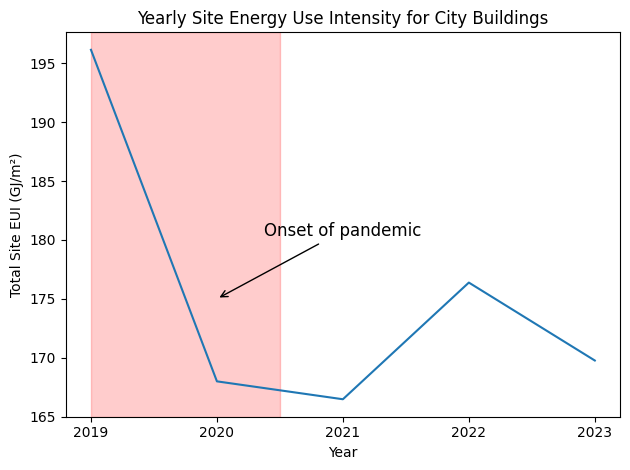

In [220]:
yearly_eui = data.groupby(['Year Ending'])['Site EUI (GJ/m²)'].sum().reset_index()
xticks = np.arange(2019, 2024, 1)
fig, ax = plt.subplots()
ax.plot(yearly_eui['Year Ending'], yearly_eui['Site EUI (GJ/m²)'])
ax.set_xticks(xticks)
ax.axvspan(2019, 2020.5, alpha=0.2, color="red")
ax.annotate("Onset of pandemic", 
            xy=(2020, 175), 
            xytext=(2021, 180),  # Text position (adjust offset as needed)
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),  # Arrow style
            fontsize=12,  
            ha="center",  
            va="bottom")

plt.title("Yearly Site Energy Use Intensity for City Buildings")
plt.xlabel('Year')
plt.ylabel('Total Site EUI (GJ/m²)')
plt.tight_layout()
plt.show()

### Comparative Bar Chart

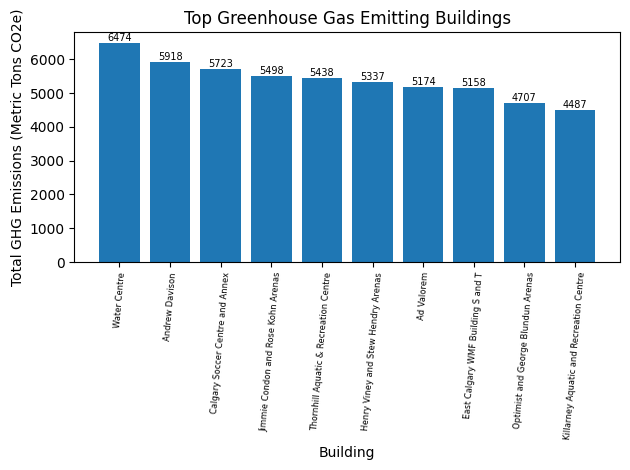

In [237]:
top_buildings = data.groupby(['Property Id', 'Property Name'])['Total GHG Emissions (Metric Tons CO2e)'].sum().sort_values(ascending=False).head(10).reset_index()

fig, ax = plt.subplots()
bars = ax.bar(top_buildings['Property Name'], top_buildings['Total GHG Emissions (Metric Tons CO2e)'])
ax.tick_params(axis='x', labelsize=6, labelrotation = 85)
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.0f}", ha="center", va='bottom', fontsize=7)

plt.title("Top Greenhouse Gas Emitting Buildings")
plt.xlabel('Building')
plt.ylabel('Total GHG Emissions (Metric Tons CO2e)')
plt.tight_layout()
plt.show()


### Heatmap Visualization

<Axes: ylabel='Primary Property Type - Self Selected'>

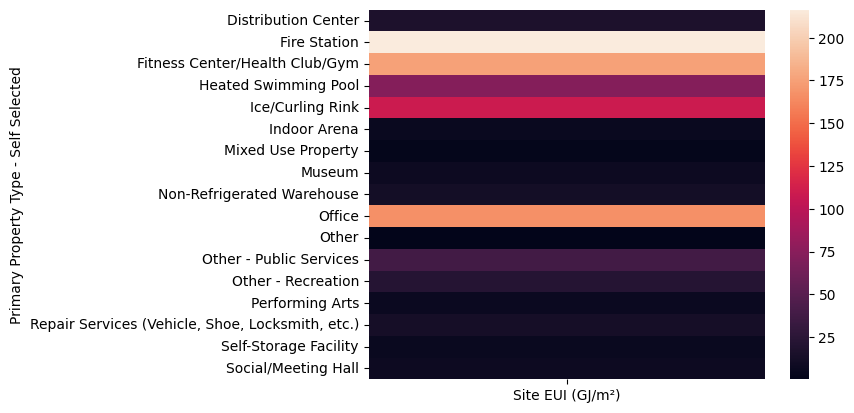

In [257]:
import seaborn as sns

energy_by_type = data.groupby(['Primary Property Type - Self Selected'])['Site EUI (GJ/m²)'].sum().reset_index()
heatmap_data = energy_by_type.pivot_table(index='Primary Property Type - Self Selected', values='Site EUI (GJ/m²)')

sns.heatmap(heatmap_data)

## Further Analysis

### Correlation Analysis

In [267]:
# build a matrix of correlation between our columns of interest
correlation_matrix = data[['Site Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']].corr()

# access the correlation numbers within the matrix, list them out pairwise
correlation_AB = correlation_matrix.loc['Site Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)']  # Correlation between Energy Use and Emissions
correlation_AC = correlation_matrix.loc['Site Energy Use (GJ)', 'Property GFA - Self-Reported (m²)']  # Correlation between Energy Use and Building Size
correlation_BC = correlation_matrix.loc['Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)'] # Correlation between Emissions and Building Size

print(f"Correlation between Energy Use and Emissions: {correlation_AB}")
print(f"Correlation between Energy Use and Building Size: {correlation_AC}")
print(f"Correlation between Emissions and Building Size: {correlation_BC}")

Correlation between Energy Use and Emissions: 0.1087803565413341
Correlation between Energy Use and Building Size: 0.7259774535411239
Correlation between Emissions and Building Size: 0.17082171479541977


The correlations above show a strong correlation between Size of building and energy use. However, they do not show a strong correlation between the emissions of a building and building size, nor emissions and energy use. We expect that the size of the building may lead to increased energy consumption, as there is more area to heat, light, and larger systems with increased size. It may be expected that these increased consumption numbers would also lead to higher emissions, however this is not the case. This lack of correlation is likely due to green alternatives mitigating the amount of emissions despite higher consumption.  

### Hypothesis Testing

The Energy Star Score column was dropped for lack of data, for this analysis we will re-import the data

In [283]:
data_redo = pd.read_csv('data/Building_Energy_Benchmarking.csv')
data_redo.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

In [ ]:
# drop the NA values in the column, otherwise answer will not be accurate
data_redo = data_redo.dropna(subset=['ENERGY STAR Score'])

In [287]:
# check out relationship between type and energy star score
data_redo.groupby(['Primary Property Type - Self Selected'])['ENERGY STAR Score'].mean()

Primary Property Type - Self Selected
Distribution Center            2.800000
Ice/Curling Rink              32.888889
Museum                        31.000000
Non-Refrigerated Warehouse    76.600000
Office                        49.468085
Self-Storage Facility         14.800000
Name: ENERGY STAR Score, dtype: float64

In [288]:
from scipy.stats import ttest_ind

#Separate two property types
museum = data_redo[data_redo['Primary Property Type - Self Selected'] == 'Museum']['ENERGY STAR Score']
office = data_redo[data_redo['Primary Property Type - Self Selected'] == 'Office']['ENERGY STAR Score']

#Perform independent t-test
t_stastic, p_value = ttest_ind(museum, office)

#Return result
if p_value < 0.05:
    print(f"There is a statistically significant difference between the two property types. p={p_value:.4f}")
else:
    print(f"There is NOT a statistically significant difference between the two property types. p={p_value:.4f}")

There is NOT a statistically significant difference between the two property types. p=0.5434


There is no statistically significant difference in energy star score between the museum and office property types, we can repeat comparing the office against another property type

In [290]:
# Repeat with distribution center
dist = data_redo[data_redo['Primary Property Type - Self Selected'] == 'Distribution Center']['ENERGY STAR Score']

# Perform independent t-test
t_stastic, p_value = ttest_ind(dist, office)

#Return result
if p_value < 0.05:
    print(f"There is a statistically significant difference between the two property types. p={p_value:.4f}")
else:
    print(f"There is NOT a statistically significant difference between the two property types. p={p_value:.4f}")

There is a statistically significant difference between the two property types. p=0.0008


The Distribution center and office types are significantly different. Likely due to the varied nature in the usage of these property types.

### Additional Tasks

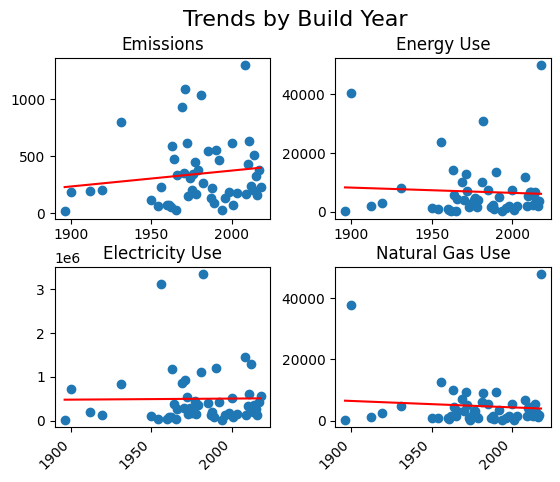

In [274]:
build_year_energy = data.groupby(['Year Built'])[['Total GHG Emissions (Metric Tons CO2e)', 'Site Energy Use (GJ)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)']].mean().reset_index()

fig, ax = plt.subplots(2, 2)
ax[0][0].plot(build_year_energy['Year Built'], build_year_energy['Total GHG Emissions (Metric Tons CO2e)'], 'o')
z = np.polyfit(build_year_energy['Year Built'], build_year_energy['Total GHG Emissions (Metric Tons CO2e)'], 1)  # Returns the coefficients [slope, intercept]
p = np.poly1d(z)         # Creates a polynomial function from the coefficients
ax[0][0].plot(build_year_energy['Year Built'], p(build_year_energy['Year Built']), "r-", label=f"Linear Trendline: y = {z[0]:.2f}x + {z[1]:.2f}")
ax[0][0].set_title("Emissions")

ax[0][1].plot(build_year_energy['Year Built'], build_year_energy['Site Energy Use (GJ)'], 'o')
z = np.polyfit(build_year_energy['Year Built'], build_year_energy['Site Energy Use (GJ)'], 1)  # Returns the coefficients [slope, intercept]
p = np.poly1d(z)         # Creates a polynomial function from the coefficients
ax[0][1].plot(build_year_energy['Year Built'], p(build_year_energy['Year Built']), "r-", label=f"Linear Trendline: y = {z[0]:.2f}x + {z[1]:.2f}")
ax[0][1].set_title("Energy Use")

ax[1][0].plot(build_year_energy['Year Built'], build_year_energy['Electricity Use - Grid Purchase (kWh)'], 'o')
z = np.polyfit(build_year_energy['Year Built'], build_year_energy['Electricity Use - Grid Purchase (kWh)'], 1)  # Returns the coefficients [slope, intercept]
p = np.poly1d(z)         # Creates a polynomial function from the coefficients
ax[1][0].plot(build_year_energy['Year Built'], p(build_year_energy['Year Built']), "r-", label=f"Linear Trendline: y = {z[0]:.2f}x + {z[1]:.2f}")
ax[1][0].set_title("Electricity Use")

ax[1][1].plot(build_year_energy['Year Built'], build_year_energy['Natural Gas Use (GJ)'], 'o')
z = np.polyfit(build_year_energy['Year Built'], build_year_energy['Natural Gas Use (GJ)'], 1)  # Returns the coefficients [slope, intercept]
p = np.poly1d(z)         # Creates a polynomial function from the coefficients
ax[1][1].plot(build_year_energy['Year Built'], p(build_year_energy['Year Built']), "r-", label=f"Linear Trendline: y = {z[0]:.2f}x + {z[1]:.2f}")
ax[1][1].set_title('Natural Gas Use')
for ax in ax[1,:]:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
fig.suptitle('Trends by Build Year', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


We see mostly flat trendlines between building age and efficiency. There is a slight downward trend in the amount of Energy Use and Natural Gas Use, with a flat trend in Electricity Use. We see Emissions increase generally the newer a building is. There are several confounding factors here, though. We have much more data for more recently built buildings, this gives survivorship bias for the older buildings, as it may be their general efficiency that keeps them from getting torn down. These could also be heritage buildings that are protected, and have been retrofitted to new standards. Additionally, as time has gone on, we have built larger, more complex buildings. A large arena or conference center that uses large amounts of energy, is more likely to be a modern building, biasing high consumption toward newer buildings. These results could possibly be improved by normalizing results to building size.